In [29]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
import sys
import pandas as pd
import json
import re

In [ ]:


EXPERIMENTS_PATH = "/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25"
EXPERIMENTS_PATH = Path(EXPERIMENTS_PATH)
MAP_NAMES = ["StandardStones","ThickStones","Piped","NonConvex"]
METHOD_NAMES = ["Blend","Cable", "RadiusDummy", "RadiusRL", "Rect"]
print(list(EXPERIMENTS_PATH.iterdir()))

[PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/readme.md'), PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/reports'), PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/ThickStones'), PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/Piped'), PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/StandardStones'), PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/benchmarks.sh'), PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/array_job.sh'), PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/Empty'), PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/NonConvex')]


In [70]:
def process_method(analytics_folder) -> pd.DataFrame:
    data_list = []
    for run in analytics_folder.iterdir():
        run_num = re.search(r'\d+', run.name).group()
        with open(run) as f:

            data = json.load(f)
            flat_data = pd.json_normalize(data).to_dict(orient='records')[0]
            flat_data["run"] = int(run_num)
            data_list.append(flat_data)
    result =pd.DataFrame(data_list)
    result.set_index("run", inplace=True)
    result.sort_index(inplace=True)
    
    return result.style.set_caption(analytics_folder.parent.name)
    

In [ ]:
# def show_cumulative_steps(df: pd.DataFrame):
    # 
    

In [66]:
def process_map(map_folder):
    map_folder = Path(map_folder)
    methods = list(map_folder.iterdir())
    print(f"Available methods for map {map_folder.name}: {methods}")
    for method in methods:
        analytics_folder = map_folder / method / "analytics"
        print(f"Processing {analytics_folder}")
        if not analytics_folder.exists():
            print(f"Folder {analytics_folder} does not exist")
            continue

        print(analytics_folder.parent.name)
        display(process_method(analytics_folder))
    

In [71]:
# for map_name in MAP_NAMES:
#     map_folder = EXPERIMENTS_PATH / map_name
#     print(f"Processing map {map_name}")
#     process_map(map_folder)
process_map(EXPERIMENTS_PATH / "ThickStones")

Available methods for map ThickStones: [PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/ThickStones/Blend'), PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/ThickStones/Rect'), PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/ThickStones/Cable'), PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/ThickStones/RadiusDummy'), PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/ThickStones/RadiusRL')]
Processing /home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/ThickStones/Blend/analytics
Blend


,tot_time,iterations,finished,collided_cnt,timeout_cnt,reached_cnt,steps_sum,sim_time,storage_time,node_cnt,path_node_cnt,env_times.export_t,env_times.import_t,env_times.render_t,env_times.reset_t,env_times.step_t
run,,,,,,,,,,,,,,,,
1,304.676190,4686,True,4306,0,380,218683,16.289683,6.657017,9850,78,29.168723,2.618355,1.454360,1.158652,190.920859
2,653.116943,8720,False,7978,0,742,400300,32.706092,31.404045,17973,0,52.616095,4.938368,2.768284,2.417697,400.925212
3,334.460388,4466,True,4042,0,424,233363,17.785403,16.747141,10564,76,31.676987,2.438103,1.512542,1.093927,203.283471
4,23.975442,189,True,171,0,18,17123,1.654776,0.132418,779,60,2.462240,0.105002,0.110832,0.046398,15.406997
5,117.458443,1426,True,1288,0,138,84815,6.753952,1.101857,3789,102,11.178754,0.772180,0.545387,0.345009,74.467391
6,282.886538,5054,True,4668,0,386,201238,15.491522,9.604468,8866,77,24.685113,2.692677,1.341480,1.219552,174.808161
7,77.640807,969,True,881,0,88,55612,4.795446,1.193070,2525,56,6.966100,0.526346,0.358981,0.236442,49.188392
8,155.254970,2005,True,1814,0,191,111151,8.821590,4.957459,4941,56,14.647706,1.086585,0.732999,0.486993,96.023511
9,231.320191,3194,True,2922,0,272,167614,14.067292,5.509172,7409,77,20.377606,1.703252,1.116565,0.764899,144.521945


Processing /home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/ThickStones/Rect/analytics
Rect


,tot_time,iterations,finished,collided_cnt,timeout_cnt,reached_cnt,steps_sum,sim_time,storage_time,node_cnt,path_node_cnt,env_times.export_t,env_times.import_t,env_times.render_t,env_times.reset_t,env_times.step_t
run,,,,,,,,,,,,,,,,
3,1402.022019,124323,True,88777,0,35546,131209,5.844889,1267.728421,35724,597,59.658018,32.113388,0.024514,4.616441,20.734181
4,304.478889,61725,True,43051,0,18674,68599,2.890807,237.504027,18833,169,30.059738,16.235027,0.024160,2.240083,10.421711
6,1753.786987,178652,True,127688,0,50964,190709,9.213193,1553.119085,51151,588,86.767830,46.278042,0.045181,7.258084,31.343987
9,2554.131972,163008,True,118981,0,44027,172514,9.642573,2373.566192,44214,800,74.054985,46.937753,0.036912,7.645880,31.562911
10,3533.712572,264704,True,193046,0,71658,276018,15.614638,3220.366687,71836,879,127.945269,78.008933,0.043349,12.405824,51.198693
14,521.731928,77933,True,56464,0,21469,84501,3.453804,443.462784,21648,203,35.292358,18.820126,0.022773,2.700684,12.499764
15,2616.090134,166917,True,115339,0,51578,178136,7.388336,2428.843664,51767,439,82.877979,46.729003,0.039739,6.027499,27.020982
16,1802.535306,202170,True,139576,0,62594,209638,10.008138,1557.052372,62787,310,111.557175,57.611004,0.027758,7.846600,34.590703
17,1373.708354,160940,True,118237,0,42703,173563,9.136612,1192.714565,42891,545,76.577497,44.233390,0.047410,6.601495,29.855137


Processing /home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/ThickStones/Cable/analytics
Cable


,tot_time,iterations,finished,collided_cnt,timeout_cnt,reached_cnt,steps_sum,sim_time,storage_time,node_cnt,path_node_cnt,env_times.export_t,env_times.import_t,env_times.render_t,env_times.reset_t,env_times.step_t
run,,,,,,,,,,,,,,,,
1,357.787773,44024,False,41198,0,2826,400012,30.317478,129.336733,8249,0,24.159316,18.741142,1.717728,2.549332,163.392136
2,454.583145,51280,False,48020,0,3260,400001,23.944026,225.564334,9191,0,26.483420,22.256034,1.630760,2.929608,155.334236
3,397.654329,45031,False,42094,0,2937,400011,34.488137,162.660478,8279,0,23.749077,18.859640,1.717377,2.615232,169.520753
4,428.175848,61353,False,57494,0,3859,400020,20.476164,194.162357,10188,0,29.157669,25.103219,1.583204,3.449058,151.080542
5,429.907507,46430,False,43457,0,2973,400029,26.197890,203.371671,8634,0,25.439373,19.349264,1.689346,2.668543,158.692549
6,441.295624,56650,False,53065,0,3585,400009,24.418734,192.747504,9810,0,30.703015,24.791250,1.666563,3.362090,164.425556
7,444.514030,57253,False,53602,0,3651,400000,17.705645,214.960936,9966,0,29.447261,23.593335,1.618817,3.236968,149.224992
8,475.853684,60493,False,56659,0,3834,400003,23.819453,227.565845,10445,0,31.263186,25.967570,1.670971,3.570289,161.084997
9,396.311982,46787,False,43827,0,2960,400007,25.095497,169.213452,8415,0,24.241822,19.981794,1.654910,2.681795,159.559688


Processing /home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/ThickStones/RadiusDummy/analytics
RadiusDummy


,tot_time,iterations,finished,collided_cnt,timeout_cnt,reached_cnt,steps_sum,sim_time,storage_time,node_cnt,path_node_cnt,env_times.export_t,env_times.import_t,env_times.render_t,env_times.reset_t,env_times.step_t
run,,,,,,,,,,,,,,,,
1,2754.634615,376514,False,316306,0,60208,400000,116.415819,1942.494948,60258,0,157.095346,216.155232,0.123419,66.838864,345.229321
2,3911.758481,379486,False,313657,0,65829,400000,121.014687,3075.011312,65884,0,179.997187,204.209292,0.111125,67.757371,355.202364
3,2738.936456,386590,False,327231,0,59359,400000,118.772486,1927.579795,59409,0,155.713078,213.623856,0.073328,68.199121,348.063120
4,3417.806148,381429,False,307982,0,73447,400000,125.270848,2553.938145,73506,0,192.061167,212.562974,0.099952,67.140302,359.600278
5,2863.107844,387884,False,317334,0,70550,400000,121.198204,1994.564528,70610,0,197.470349,213.935412,0.066980,69.639918,356.101736
6,3051.352002,374584,False,305992,0,68592,400000,119.354318,2208.507216,68658,0,191.340833,205.793642,0.136915,66.555594,349.156283
7,3884.986054,379146,False,310426,0,68720,400000,122.141453,3032.430516,68772,0,188.754460,207.731029,0.116344,68.653160,354.960000
8,3453.413537,385334,False,309059,0,76275,400000,125.118702,2561.334250,76355,0,217.698478,213.489340,0.085205,69.296338,357.693902
9,4038.538699,387281,False,317853,0,69428,400000,131.402047,3159.185122,69488,0,188.409802,216.912266,0.075028,69.886414,373.087579


Processing /home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/ThickStones/RadiusRL/analytics
RadiusRL


,tot_time,iterations,finished,collided_cnt,timeout_cnt,reached_cnt,steps_sum,sim_time,storage_time,node_cnt,path_node_cnt,env_times.export_t,env_times.import_t,env_times.render_t,env_times.reset_t,env_times.step_t
run,,,,,,,,,,,,,,,,
1,1186.760335,82904,False,69092,0,13812,400000,42.806798,441.076804,24823,0,77.553703,56.627595,2.248769,26.116336,398.540871
2,1217.752404,101911,False,87918,0,13993,400002,30.626695,483.249675,15962,0,54.098069,69.648677,2.364977,32.188139,395.690842
3,2105.520574,149654,False,127408,0,22246,400014,52.122877,1238.928848,31479,0,103.797291,103.100237,1.774533,46.685250,416.826524
4,2515.573291,171756,False,144037,0,27719,400001,55.916812,1610.759418,34308,0,114.053471,116.618608,1.697263,52.935029,422.646907
5,1213.126472,137884,False,120084,0,17800,400000,61.878738,407.975588,19384,0,61.490691,92.210209,1.896415,42.786316,422.367470
6,1502.236428,133381,False,113214,0,20167,400000,48.280260,682.733180,27349,0,90.621615,91.149987,1.965870,41.913652,410.377396
7,2523.694850,178081,False,149232,0,28849,400033,55.132497,1594.403891,34809,0,117.207370,124.827745,1.681853,56.463220,429.116375
8,2220.179890,206859,False,178860,0,27999,400003,75.463681,1235.173835,33670,0,116.201271,146.068182,1.427362,66.229887,447.865769
9,2125.908166,205083,False,176072,0,29011,400000,45.586480,1172.312538,32063,0,109.791735,145.809454,1.436649,66.337152,423.040069


In [57]:
example_analytics_folder = EXPERIMENTS_PATH / MAP_NAMES[0]/ "Rect" / "analytics"
df = process_method(example_analytics_folder)
display(df)

,tot_time,iterations,finished,collided_cnt,timeout_cnt,reached_cnt,steps_sum,sim_time,storage_time,node_cnt,path_node_cnt,env_times.export_t,env_times.import_t,env_times.render_t,env_times.reset_t,env_times.step_t
run,,,,,,,,,,,,,,,,
1,89.443994,14757,True,6843,0,7914,20880,0.528832,57.489564,8093,126,20.365893,5.253820,0.020816,0.526536,2.869594
2,1244.575745,74690,True,34767,0,39923,80680,3.611768,1025.808213,40115,280,128.864216,40.150221,0.023583,3.703783,15.445697
3,1532.029941,111605,True,75856,0,35749,121475,6.630293,1314.239664,35934,318,110.547957,54.713101,0.043480,5.427299,23.536094
4,342.881855,46475,True,32911,0,13564,55327,2.669043,253.818195,13762,264,45.625908,23.330542,0.036365,2.077316,10.118614
5,600.451661,46683,True,24810,0,21873,52388,2.368850,477.424180,22066,142,73.713302,24.221978,0.023175,2.238753,9.805182
6,22.072434,5093,True,3171,0,1922,11994,0.253375,11.243241,2085,123,6.051684,2.360745,0.024472,0.190802,1.444797
7,127.380970,32406,True,25607,0,6799,38360,1.524724,87.496498,6940,145,17.886643,12.263576,0.020770,1.122850,5.650915
8,3.450178,838,True,303,0,535,4845,0.039475,0.780197,701,83,1.587629,0.441807,0.013181,0.029002,0.430541
9,265.110626,34102,True,22559,0,11543,41803,1.580057,208.831380,11704,196,30.978993,13.591262,0.027683,1.275028,6.287491


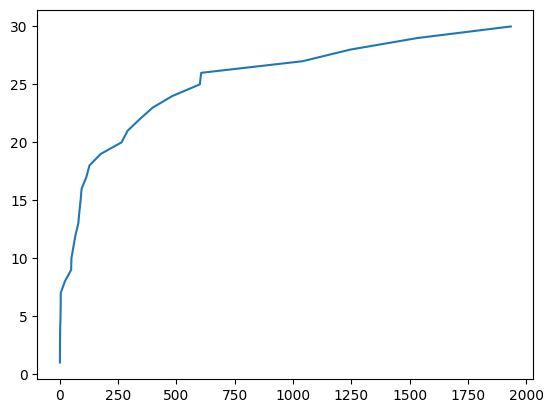

In [82]:
df.tot_time.sort_values()
x_pts = []
s = 0
y_pts = []
for pts in df.tot_time.sort_values():
    x_pts.append(pts)
    s +=1
    y_pts.append(s)
plt.plot(x_pts, y_pts)
plt.show()
